<a href="https://colab.research.google.com/github/gprasads/Wine-Prediction/blob/master/MLhw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#importing libraries
import numpy as np
import matplotlib.pyplot as mpl
import pandas as pd

train_data = pd.read_csv('/content/drive/My Drive/ml_hw2/trainData.csv')
train_labels = pd.read_csv('/content/drive/My Drive/ml_hw2/trainLabels.csv')
test_data = pd.read_csv('/content/drive/My Drive/ml_hw2/valData.csv')
test_labels= pd.read_csv('/content/drive/My Drive/ml_hw2/valLabels.csv')
submission_input=pd.read_csv('/content/drive/My Drive/ml_hw2/testData_new.csv')

train_data = train_data.iloc[:,1:]
train_labels = train_labels.iloc[:,1:]
test_data = test_data.iloc[:,1:]
test_labels = test_labels.iloc[:,1:]
submission_data = submission_input.iloc[:,1:]


In [0]:
train_labels

,85
0,92
1,86
2,87
3,88
4,93
5,90
6,92
7,87
8,84
9,96


In [0]:
features = pd.read_csv('/content/drive/My Drive/ml_hw2/featureTypes.txt')
pseudo_train_labels=train_labels.iloc[:,:]
pseudo_train_labels.columns=['Columns']
clubbed_data=train_data.join(pseudo_train_labels)
features.columns=['Feature names']
feature_dataframe=pd.DataFrame({'Columns':train_data.columns}).join(features)
#feature_dataframe.to_csv('featuresset.csv', header=False, index=False)
corr_matrix = clubbed_data.corr()
clubbed_data

In [0]:
pd.DataFrame(corr_matrix["Columns"].abs().sort_values(ascending=False).head(1000))

In [0]:
pd.DataFrame(corr_matrix["Columns"].abs().sort_values(ascending=True).head(11))

,Columns
0.0.1668,0.000002
0.0.1903,0.000015
0.0.1976,0.000022
0.0.852,0.000110
0.0.1234,0.000121
0.0.112,0.000123
0.0.2463,0.000129
0.0.2896,0.000129
0.0.2135,0.000164
0.0.2898,0.000174


In [0]:
import numpy as np
import pandas as pd


def Ridge_function(X, Y, L):
    (rows, columns) = X.shape
    X1 = np.ones(columns, dtype=int)
    Xbar = np.vstack([X, X1])

    Xbar_transpose = np.transpose(Xbar)

    I = np.identity(rows)
    Ibar = np.pad(I, [(0, 1), (0, 1)], mode='constant')

    C = Xbar.dot(Xbar_transpose) + np.array(Ibar) * L
    D = Xbar.dot(Y)

    Cinv = np.linalg.inv(C)
    Wbar = np.linalg.solve(C,D)

    B = Wbar[-1]
    W = Wbar[:-1]

    Ytranspose = np.transpose(Y)
    Wtranspose = np.transpose(W)
    Rsum = 0
    for i in range(columns):
        XI = X[..., i].ravel()
        XItranspose = np.transpose(XI)
        Wsum = Wtranspose.dot(XItranspose)
        Rsum = Rsum + (Wsum + B[0] - Ytranspose[0][i]) ** 2

    Wsquare = 0
    for k in range(rows):
        Wsquare = Wtranspose[0][k] ** 2 + Wsquare

    ridge_objective = Rsum + Wsquare

    Errs = []
    for i in range(columns):
        XIbar = Xbar[...,i].ravel()
        Err = XIbar.dot(Wbar)-Y[i][0]
        XIbartranspose=np.transpose(XIbar)
        temp=XIbartranspose.dot(Cinv)
        denominator=1-temp.dot(XIbar)
        Errs.append(Err[0]/denominator)
        

    return [W, B[0], ridge_objective[0], Errs]


In [0]:
custom_ridge_predictions=[]
custom_ridge=Ridge_function(np.transpose(train_data.values),train_labels.values,1)

custom_ridge_coeff=custom_ridge[0]
custom_loocv_errors=custom_ridge[3]
custom_b_value=custom_ridge[1]
custom_ridge_objective=custom_ridge[2]



In [0]:


custom_ridge_predictions=[]
custom_ridge=Ridge_function(np.transpose((train_data.append(test_data)).values),(train_labels.append(test_labels)).values,.7)

custom_ridge_coeff=custom_ridge[0]
custom_loocv_errors=custom_ridge[3]
custom_b_value=custom_ridge[1]
custom_ridge_objective=custom_ridge[2]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [0]:
custom_ridge_coeff

array([[nan, nan],
       [nan, nan],
       [nan, nan],
       ...,
       [nan, nan],
       [nan, nan],
       [nan, nan]])

In [0]:
predictions=[]
for i in range(len(test_data.values)):
  pred=test_data.values[i].dot(custom_ridge_coeff)+custom_b_value
  predictions.append(pred[0])
predictions



In [0]:
custom_rms=[]
square_sum=0
for i in range(len(test_labels.values)):
  custom_rms.append((predictions[i]-test_labels.values[i])**2)
variance=np.mean(custom_rms)

np.sqrt(variance)


In [0]:
lambdas=[0.001,.01,0.1,1,10,100,1000]
loocvs=[]
rmss=[]
train_rmss=[]
for i in lambdas:
  custom_ridge=Ridge_function(np.transpose(train_data.values),train_labels.values,i)

  custom_ridge_coeff=custom_ridge[0]
  custom_loocv_errors=custom_ridge[3]
  custom_b_value=custom_ridge[1]
  custom_ridge_objective=custom_ridge[2]
  predictions=[]
  for i in range(len(test_data.values)):
    pred=test_data.values[i].dot(custom_ridge_coeff)+custom_b_value
    predictions.append(pred[0])
  custom_rms=[]
  for i in range(len(test_data.values)):
    custom_rms.append((predictions[i]-test_labels.values[i])**2)
  custom_loocvs=[]
  for i in custom_loocv_errors:
    custom_loocvs.append(i**2)
    
  train_predictions=[]
  for i in range(len(train_data.values)):
    pred=train_data.values[i].dot(custom_ridge_coeff)+custom_b_value
    train_predictions.append(pred[0])
  custom_train_rms=[]
  for i in range(len(train_labels.values)):
    custom_train_rms.append((train_predictions[i]-train_labels.values[i])**2)
    
  train_rmss.append(np.sqrt(np.mean(custom_train_rms)))
  rmss.append(np.sqrt(np.mean(custom_rms)))
  loocvs.append(np.sqrt(np.mean(custom_loocvs)))

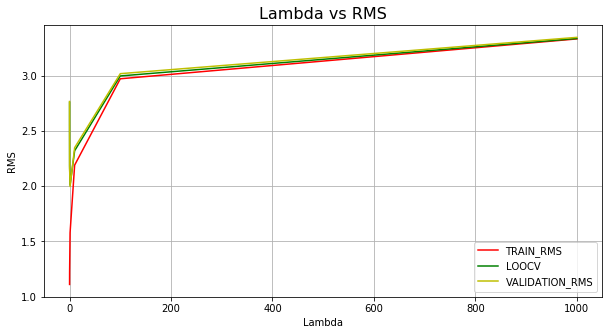

In [0]:
fig, ax=mpl.subplots(figsize=(10, 5))
ax.plot(lambdas,train_rmss,'r',lambdas,loocvs,'g',lambdas,rmss,'y')
ax.set_xlabel("Lambda")
ax.set_ylabel("RMS")
ax.set_title("Lambda vs RMS", fontsize=16)
ax.legend(labels=['TRAIN_RMS','LOOCV','VALIDATION_RMS'])
ax.grid(True)

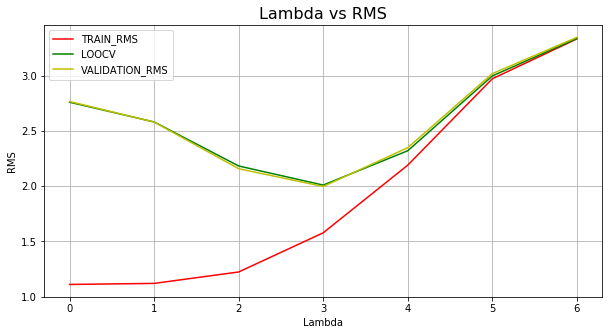

In [0]:
fig, ax=mpl.subplots(figsize=(10, 5))
ax.plot(train_rmss,'r',loocvs,'g',rmss,'y')
ax.set_xlabel("Lambda")
ax.set_ylabel("RMS")
ax.set_title("Lambda vs RMS", fontsize=16)
ax.legend(labels=['TRAIN_RMS','LOOCV','VALIDATION_RMS'])
ax.grid(True)

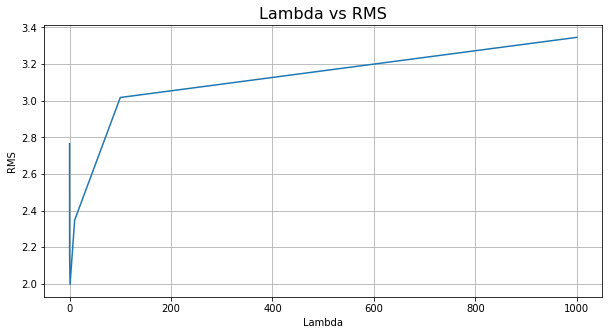

In [0]:
fig, ax=mpl.subplots(figsize=(10, 5))
ax.plot(lambdas,rmss)
ax.set_xlabel("Lambda")
ax.set_ylabel("RMS")
ax.set_title("Lambda vs RMS", fontsize=16)
ax.grid(True)

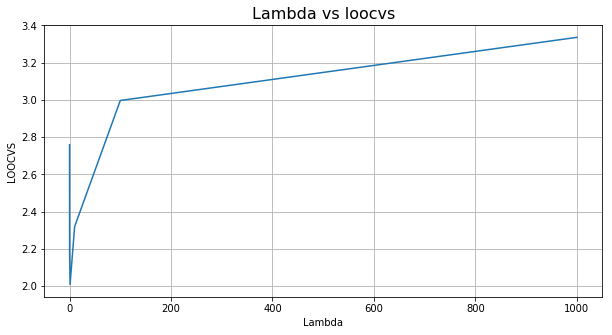

In [0]:
fig, bx=mpl.subplots(figsize=(10, 5))
bx.plot(lambdas,loocvs)
bx.set_xlabel("Lambda")
bx.set_ylabel("LOOCVS")
bx.set_title("Lambda vs loocvs", fontsize=16)
bx.grid(True)

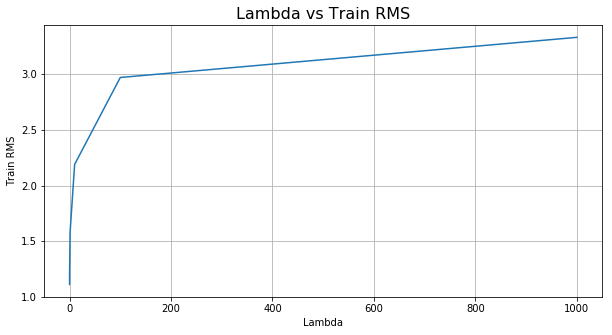

In [0]:
fig, ax=mpl.subplots(figsize=(10, 5))
ax.plot(lambdas,train_rmss)
ax.set_xlabel("Lambda")
ax.set_ylabel("Train RMS")
ax.set_title("Lambda vs Train RMS", fontsize=16)
ax.grid(True)

In [0]:
import pandas as pd
predictions=[]
for i in range(len(submission_data.values)):
  pred=submission_data.values[i].dot(custom_ridge_coeff)+custom_b_value
  predictions.append(pred[0])

dataframe = pd.DataFrame(pd.Series(predictions))   
dataframe.to_csv('submission.csv', header=False, index=False)